# Train Test Split

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics
from sklearn.feature_selection import RFE

import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms

In [2]:
df = pd.read_csv('model_data.csv')
df.head()

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,br_2,...,gd_4,gd_5,gd_6,gd_7,gd_8,gd_9,gd_10,gd_11,gd_12,wf_1.0
0,221900.0,-1.096635,-0.304539,1180,0.0,1955,1955.0,-0.992008,-0.319209,0,...,0,0,0,1,0,0,0,0,0,0
1,538000.0,0.870195,0.046284,2170,400.0,1951,1991.0,-0.245102,0.137043,0,...,0,0,0,1,0,0,0,0,0,0
2,180000.0,-2.175269,0.502317,770,0.0,1933,1933.0,1.286644,0.218571,1,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,0.185533,-0.477261,1050,910.0,1965,1965.0,-0.944324,-0.504090,0,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,-0.203973,0.201026,1680,0.0,1987,1987.0,-0.042143,0.109869,0,...,0,0,0,0,1,0,0,0,0,0


In [3]:
linreg = LinearRegression()

# our feature variables
X = df.drop(['price'], axis=1)

# our target variable
y = df['price']

# separate our data into testing and training subsets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

# fitting our training feature variables to our training target variable (price)
linreg.fit(X_train, y_train)

# predicted prices from our training subset
y_hat_train = linreg.predict(X_train)

# predicted prices from our testing subset
y_hat_test = linreg.predict(X_test)

# calculating residuals
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

# calculate mean square error for our test and training results
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', round(train_mse,2))
print('Test Mean Squared Error:', round(test_mse,2))

# calculate r-squared
r2 = round(linreg.score(X,y), 3)
print("R Squared:", r2)

# calculate mean absolute error
mean_abs_err = metrics.mean_absolute_error(y_test, y_hat_test)
print("Mean Absolute Error:", round(mean_abs_err,2))

# calculate root mean squared error
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_hat_test))
print("Root Mean Squared Error:", round(rmse,2))

# calculate mean predicted price and mean actual price
average_predicted_price = y_hat_test.mean()
average_actual_price = y_test.mean()
print("Average Predicted Price:", round(average_predicted_price,2))
print("Average Actual Price:", round(average_actual_price,2))
print("Difference:", round(average_predicted_price - average_actual_price, 2))

Train Mean Squared Error: 18734722588.94
Test Mean Squared Error: 18450854084.6
R Squared: 0.612
Mean Absolute Error: 104553.88
Root Mean Squared Error: 135833.92
Average Predicted Price: 480476.9
Average Actual Price: 480593.35
Difference: -116.45


In [7]:
## R-Squared of .61, but RSME is 135,833.92 meaning that my model is about $135,833 off of the price value of a home.
# This will be my baseline as I start to look further into how to tighten this model up. 

In [4]:
X = df.drop(['price'], axis=1)
y = df['price']

In [5]:
import statsmodels.api as sm
X_int = sm.add_constant(X)
model = sm.OLS(y,X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     613.7
Date:                Wed, 04 Nov 2020   Prob (F-statistic):               0.00
Time:                        12:58:45   Log-Likelihood:            -2.6278e+05
No. Observations:               19842   AIC:                         5.257e+05
Df Residuals:                   19790   BIC:                         5.261e+05
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.237e+06   1.89e+05     27.775      0.000    4.87e+06    5.61e+06
sqft_living    3533.3721   5168.306      0.684      0.494   -6596.941    1.37e+04
sqft_lot      -1.785e+04   2478.162     -7.202      0.000   -2.27e+04    -1.3e+04
sqft_above       78.8323      6.608     11.931      0.000      65.881      91.784
sqft_basement    90.3593      6.825     13.239      0.000      76.981     103.737
yr_built      -3011.6636     94.819    -31.762      0.000   -3197.516   -2825.811
yr_renovated    316.4296     96.700      3.272      0.001     126.890     505.970
sqft_living15  4.418e+04   1614.682     27.364      0.000     4.1e+04    4.73e+04
sqft_lot15    -1.634e+04   2376.987     -6.874      0.000    -2.1e+04   -1.17e+04
br_2           1.818e+04    1.1e+04      1.650      0.099   -3410.511    3.98e+04
br_3          -5623.1347   1.12e+04     -0.502      0.616   -2.76e+04    1.64e+04
br_4          -1.852e+04   1.15e+04     -1.612      0.107    -4.1e+04    3995.057
br_5          -2.713e+04   1.21e+04     -2.245      0.025   -5.08e+04   -3445.675
br_6          -3.251e+04    1.5e+04     -2.173      0.030   -6.18e+04   -3181.750
br_7          -4.363e+04   2.83e+04     -1.541      0.123   -9.91e+04    1.18e+04
br_8          -3.515e+04   4.99e+04     -0.704      0.482   -1.33e+05    6.27e+04
bath_0.75      1.239e+05   7.07e+04      1.751      0.080   -1.48e+04    2.62e+05
bath_1.0       1.105e+05   6.85e+04      1.613      0.107   -2.38e+04    2.45e+05
bath_1.25      1.159e+05   8.58e+04      1.350      0.177   -5.23e+04    2.84e+05
bath_1.5       1.132e+05   6.86e+04      1.651      0.099   -2.12e+04    2.48e+05
bath_1.75      1.254e+05   6.86e+04      1.829      0.067   -8983.593     2.6e+05
bath_2.0        1.26e+05   6.86e+04      1.837      0.066   -8476.562     2.6e+05
bath_2.25       1.35e+05   6.86e+04      1.968      0.049     526.953     2.7e+05
bath_2.5       1.251e+05   6.86e+04      1.823      0.068   -9428.790     2.6e+05
bath_2.75      1.526e+05   6.87e+04      2.220      0.026    1.79e+04    2.87e+05
bath_3.0       1.527e+05   6.88e+04      2.219      0.026    1.78e+04    2.88e+05
bath_3.25       1.77e+05    6.9e+04      2.566      0.010    4.18e+04    3.12e+05
bath_3.5       1.891e+05   6.89e+04      2.744      0.006     5.4e+04    3.24e+05
bath_3.75      2.329e+05   7.02e+04      3.318      0.001    9.53e+04     3.7e+05
bath_4.0       1.891e+05   7.05e+04      2.680      0.007    5.08e+04    3.27e+05
bath_4.25      2.058e+05   7.33e+04      2.806      0.005     6.2e+04    3.49e+05
bath_4.5       1.422e+05   7.16e+04      1.987      0.047    1917.636    2.83e+05
bath_4.75      1.612e+05   9.23e+04      1.747      0.081   -1.96e+04    3.42e+05
flr_1.5        9761.6661   4021.947      2.427      0.015    1878.313    1.76e+04
flr_2.0        7076.1217   3618.912      1.955   

In [6]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
linreg.coef_

array([ 3.53337215e+03, -1.78465884e+04,  7.88323163e+01,  9.03592944e+01,
       -3.01166358e+03,  3.16429559e+02,  4.41836493e+04, -1.63392464e+04,
        1.81800307e+04, -5.62313474e+03, -1.85180246e+04, -2.71320099e+04,
       -3.25066265e+04, -4.36287709e+04, -3.51461239e+04,  1.23850744e+05,
        1.10492906e+05,  1.15895842e+05,  1.13249421e+05,  1.25437447e+05,
        1.25993271e+05,  1.35041734e+05,  1.25052114e+05,  1.52565618e+05,
        1.52695168e+05,  1.76962685e+05,  1.89064665e+05,  2.32902334e+05,
        1.89060610e+05,  2.05768510e+05,  1.42223686e+05,  1.61214116e+05,
        9.76166608e+03,  7.07612168e+03,  3.61847653e+04,  7.26421041e+04,
        7.11002447e+04,  3.47246724e+04,  6.81922314e+04,  8.70389639e+04,
        1.19050684e+05,  4.60887619e+03,  2.92398684e+02,  5.29056881e+04,
        1.35542930e+05,  2.29004878e+05,  3.59034122e+05,  4.45073190e+05,
        5.38923247e+05,  5.42870816e+05,  2.61725862e+05])

In [8]:
linreg.intercept_

5237398.976990887

# Stepwise Selection

In [10]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ 
    Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [11]:
result = stepwise_selection(X, y, verbose = True)
print('resulting features:')
print(result)

Add  gd_6                           with p-value 0.0
Add  sqft_living                    with p-value 0.0
Add  gd_7                           with p-value 2.01694e-294
Add  yr_renovated                   with p-value 0.0
Add  gd_8                           with p-value 0.0
Add  gd_5                           with p-value 1.06662e-259
Add  yr_built                       with p-value 2.13466e-172
Add  sqft_lot                       with p-value 5.96937e-158
Drop yr_renovated                   with p-value 0.227389
Add  sqft_living15                  with p-value 1.54428e-156
Add  gd_9                           with p-value 1.15128e-98
Add  gd_4                           with p-value 4.02446e-52
Add  wf_1.0                         with p-value 1.80408e-45
Add  con_5                          with p-value 1.15912e-28
Add  flr_3.0                        with p-value 3.73789e-26
Add  gd_10                          with p-value 2.80616e-24
Add  br_2                           with p-value 1.057

In [12]:
import statsmodels.api as sm
X_fin = X[result]
X_with_intercept = sm.add_constant(X_fin)
model = sm.OLS(y,X_with_intercept).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     1007.
Date:                Wed, 04 Nov 2020   Prob (F-statistic):               0.00
Time:                        13:03:52   Log-Likelihood:            -2.6281e+05
No. Observations:               19842   AIC:                         5.257e+05
Df Residuals:                   19810   BIC:                         5.259e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.935e+06   9.53e+04     62.290      0.000    5.75e+06    6.12e+06
gd_6          -4.828e+05   1.28e+04    -37.604      0.000   -5.08e+05   -4.58e+05
gd_7          -3.999e+05   1.21e+04    -32.960      0.000   -4.24e+05   -3.76e+05
gd_8          -3.054e+05   1.18e+04    -25.926      0.000   -3.29e+05   -2.82e+05
gd_5          -5.357e+05   1.56e+04    -34.244      0.000   -5.66e+05   -5.05e+05
yr_built      -3048.4661     92.861    -32.828      0.000   -3230.482   -2866.450
sqft_lot      -1.946e+04   2426.028     -8.022      0.000   -2.42e+04   -1.47e+04
sqft_living15  4.423e+04   1594.462     27.740      0.000    4.11e+04    4.74e+04
gd_9          -1.753e+05   1.16e+04    -15.158      0.000   -1.98e+05   -1.53e+05
gd_4          -5.256e+05   3.04e+04    -17.312      0.000   -5.85e+05   -4.66e+05
wf_1.0         2.651e+05    1.9e+04     13.981      0.000    2.28e+05    3.02e+05
con_5          8.884e+04   1.11e+04      8.003      0.000    6.71e+04    1.11e+05
flr_3.0        6.488e+04   6471.925     10.024      0.000    5.22e+04    7.76e+04
gd_10         -8.924e+04    1.2e+04     -7.439      0.000   -1.13e+05   -6.57e+04
br_2           3.486e+04   3805.593      9.161      0.000    2.74e+04    4.23e+04
bath_3.5       6.274e+04   6478.140      9.684      0.000       5e+04    7.54e+04
bath_3.25      5.068e+04   7135.897      7.102      0.000    3.67e+04    6.47e+04
bath_3.75      1.034e+05   1.49e+04      6.960      0.000    7.43e+04    1.33e+05
con_4          5.671e+04   1.07e+04      5.308      0.000    3.58e+04    7.76e+04
sqft_lot15     -1.66e+04   2370.639     -7.001      0.000   -2.12e+04   -1.19e+04
bath_2.75      2.623e+04   4540.534      5.777      0.000    1.73e+04    3.51e+04
sqft_basement    91.3569      3.150     28.999      0.000      85.182      97.532
sqft_above       85.4062      2.791     30.599      0.000      79.935      90.877
br_3           1.333e+04   2413.551      5.523      0.000    8600.096    1.81e+04
yr_renovated    336.0924     96.103      3.497      0.000     147.722     524.463
bath_3.0       2.629e+04   5706.373      4.607      0.000    1.51e+04    3.75e+04
bath_1.0      -1.576e+04   3514.795     -4.483      0.000   -2.26e+04   -8866.589
con_3           3.83e+04   1.06e+04      3.597      0.000    1.74e+04    5.92e+04
bath_1.5      -1.244e+04   4080.465     -3.048      0.002   -2.04e+04   -4440.924
bath_4.0       5.782e+04   1.63e+04      3.538      0.000    2.58e+04    8.99e+04
bath_2.25      1.019e+04   3455.197      2.948      0.003    3414.511     1.7e+04
bath_4.25      7.554e+04   2.58e+04      2.931      0.003     2.5e+04    1.26e+05
==============================================================================
Omnibus:                     1211.796   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB

In [15]:
# Selecting 5 most important features
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 5)
selector = selector.fit(X, y.values.ravel()) # convert y to 1d np array to prevent DataConversionWarning
selector.support_ 

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True])

In [16]:
selected_columns = X.columns[selector.support_ ]
linreg.fit(X[selected_columns],y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
yhat = linreg.predict(X[selected_columns])

In [18]:
SS_Residual = np.sum((y-yhat)**2)
SS_Total = np.sum((y-np.mean(y))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X[selected_columns].shape[1]-1)

In [19]:
r_squared

0.31084956030795596

In [20]:
adjusted_r_squared

0.31067584825923344

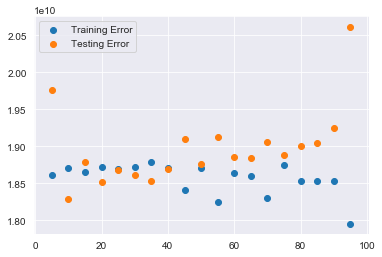

In [21]:
import random
random.seed(110)

train_err = []
test_err = []
t_sizes = list(range(5,100,5))
for t_size in t_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size/100)
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_err.append(mean_squared_error(y_train, y_hat_train))
    test_err.append(mean_squared_error(y_test, y_hat_test))
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.legend()